<a href="https://colab.research.google.com/github/Harini0920/Curneu-Assessment/blob/main/HOUSE_RENT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
myfile = files.upload()

Saving houses_to_rent.csv to houses_to_rent.csv


# Opening and Viewing the data

In [ ]:
df_houses = pd.read_csv('houses_to_rent.csv')

In [ ]:
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:

def missing_values(data):
    
    # Null total 
    missing_values = df_houses.isnull().sum()
    
    # Order nulls 
    total = missing_values.sort_values(ascending=True)
    
    # Percentage  
    percent = (missing_values / len(df_houses.index)*100).round(2).sort_values(ascending=True)

    table_missing = pd.concat([total, percent], axis=1, keys=['Number of Nulls', 'Percentagem of Nulls'])
  
    return table_missing.tail(10)


We do not have missing values on our data set 

In [ ]:
missing_values(df_houses)

,Number of Nulls,Percentagem of Nulls
bathroom,0,0.0
parking spaces,0,0.0
floor,0,0.0
animal,0,0.0
furniture,0,0.0
hoa (R$),0,0.0
rent amount (R$),0,0.0
property tax (R$),0,0.0
fire insurance (R$),0,0.0
total (R$),0,0.0


# Data Cleaning

In [ ]:
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


In [ ]:
df_houses['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


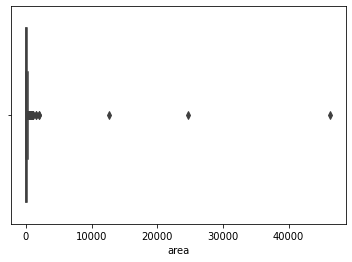

In [ ]:
sns.boxplot(df_houses['area'])

In [ ]:
df_houses['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


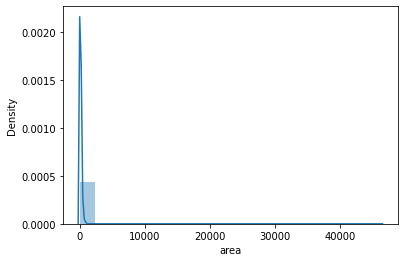

In [ ]:
sns.distplot(df_houses['area'],bins= 20)

In [ ]:
df_houses['area'].unique()

array([   70,   320,    80,    51,    25,   376,    72,   213,   152,
          35,    26,    46,    36,    55,   100,   330,   110,    88,
          56,   600,    42,   160,    90,    49,    41,    64,   208,
          20,    32,    45,   350,    38,    30,    40,   300,   240,
         200,   360,   250,    48,   150,    60,    31,   210,   280,
          93,    75,   194,    65,   278,    61,   130,   164,   220,
         108,   128,    47,   170,    68,    63,   145,    85,   254,
         296,   133,    44,    22,    50,    67,   109,   400,   284,
         309,    73,   155,    58,    94,    76,   192,   217,    95,
         900,    34,    62,   180,   140,    52,   999,   270,    71,
         500,    96,   660,   107,   105,   287,    24,   154,   101,
         384,    57,    39,    78,    28,    83,   750,   258,   123,
         127,   219,   420,    59,   225,   480,    53,   121,    43,
         570,    89,   173,    91,   530,    87,   136,   308,   260,
         120,    33,

In [ ]:
highier_1000 = df_houses.query('area >1000')
highier_1000.head(9)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
654,São Paulo,1600,6,6,6,-,acept,furnished,0,7600,1834,115,9549
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
2423,Belo Horizonte,1020,5,4,6,-,acept,furnished,0,6520,654,107,7281
3559,São Paulo,1100,4,6,10,-,acept,not furnished,3000,14000,2000,211,19210
4813,São Paulo,1600,4,5,12,-,acept,not furnished,1,6900,5000,104,12010
5129,Belo Horizonte,2000,4,2,3,-,acept,not furnished,0,4956,200,82,5238
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


In [ ]:
highier_1000.shape

(9, 13)

In [ ]:
df_houses = df_houses.query('area<=1000')

df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df_houses.shape

(10683, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


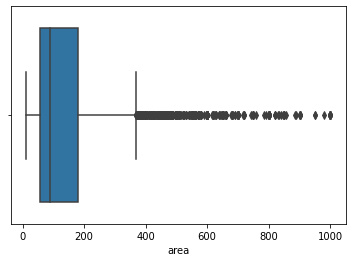

In [ ]:
sns.boxplot(df_houses['area'])

In [ ]:
df_houses['area'].describe()

count    10683.000000
mean       140.638865
std        129.829151
min         11.000000
25%         56.000000
50%         90.000000
75%        181.500000
max       1000.000000
Name: area, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


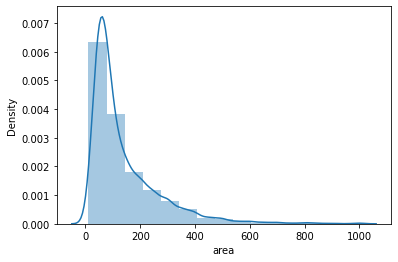

In [ ]:
sns.distplot(df_houses['area'],bins= 15)

### Rooms

In [ ]:
df_houses['rooms'].describe()

count    10683.000000
mean         2.504634
std          1.170397
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


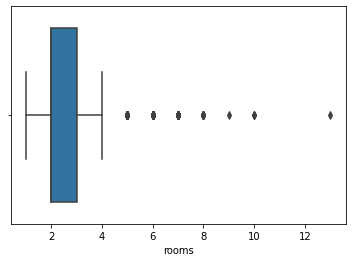

In [ ]:
sns.boxplot(df_houses['rooms'])

In [ ]:
df_houses['rooms'].unique()

array([ 2,  4,  1,  3,  7,  5,  8,  6, 10, 13,  9])

In [ ]:
rooms = df_houses.query('rooms >6 & area<150')

rooms

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
20,São Paulo,100,7,4,0,-,acept,not furnished,0,3800,118,58,3976
2867,Belo Horizonte,100,7,2,1,-,acept,not furnished,0,2800,28,46,2874


### Bathroom

In [ ]:
df_houses['bathroom'].unique()

array([ 1,  4,  3,  2,  6,  5,  7,  9,  8, 10])

In [ ]:
filter_180 = df_houses.query('bathroom==1 & area>180')
filter_180

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
56,São Paulo,280,3,1,2,-,acept,not furnished,0,6000,113,91,6204
402,Campinas,181,2,1,2,-,acept,not furnished,0,1400,132,22,1554
743,São Paulo,197,3,1,2,-,acept,not furnished,0,2100,290,32,2422
907,Porto Alegre,230,4,1,1,3,acept,not furnished,1287,3500,370,52,5209
950,Campinas,212,4,1,2,-,acept,not furnished,0,1500,88,23,1611
1254,Belo Horizonte,184,3,1,2,1,acept,furnished,300,4000,110,54,4464
1518,São Paulo,206,2,1,3,-,acept,not furnished,0,3500,214,53,3767
1528,Belo Horizonte,250,4,1,8,-,acept,not furnished,0,2125,231,35,2391
2260,Belo Horizonte,200,4,1,2,4,acept,not furnished,345,2500,209,34,3088
2309,Belo Horizonte,360,3,1,3,-,acept,not furnished,0,1500,142,25,1667


In [ ]:
test_menor100 =df_houses.query('bathroom==1 & area<=100')

test_menor100

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10677,São Paulo,38,1,1,0,19,not acept,not furnished,583,1000,46,13,1642
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926


The mean of the column Bathroom

In [ ]:
media = df_houses['bathroom'].mean()
media

2.234952728634279

I m going to make a function to convert the datapoints equal 1 from the column bathroom 

In [ ]:
def medias (valor):
    if valor == 1 :
      return round(df_houses['bathroom'].mean())
    else :
      return valor
    

In [ ]:
test_maior =df_houses.query('bathroom==1 & area>150')

test_maior.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
56,São Paulo,280,3,1,2,-,acept,not furnished,0,6000,113,91,6204
402,Campinas,181,2,1,2,-,acept,not furnished,0,1400,132,22,1554
425,São Paulo,160,3,1,2,-,acept,not furnished,0,5000,225,76,5301
696,São Paulo,180,3,1,0,-,acept,not furnished,0,2500,334,38,2872
743,São Paulo,197,3,1,2,-,acept,not furnished,0,2100,290,32,2422
907,Porto Alegre,230,4,1,1,3,acept,not furnished,1287,3500,370,52,5209
950,Campinas,212,4,1,2,-,acept,not furnished,0,1500,88,23,1611
1254,Belo Horizonte,184,3,1,2,1,acept,furnished,300,4000,110,54,4464
1382,Porto Alegre,169,2,1,1,-,acept,not furnished,0,2800,55,50,2905
1518,São Paulo,206,2,1,3,-,acept,not furnished,0,3500,214,53,3767


In [ ]:
test_maior['bathroom'] = test_maior['bathroom'].apply(medias)

test_maior.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
56,São Paulo,280,3,2,2,-,acept,not furnished,0,6000,113,91,6204
402,Campinas,181,2,2,2,-,acept,not furnished,0,1400,132,22,1554
425,São Paulo,160,3,2,2,-,acept,not furnished,0,5000,225,76,5301
696,São Paulo,180,3,2,0,-,acept,not furnished,0,2500,334,38,2872
743,São Paulo,197,3,2,2,-,acept,not furnished,0,2100,290,32,2422
907,Porto Alegre,230,4,2,1,3,acept,not furnished,1287,3500,370,52,5209
950,Campinas,212,4,2,2,-,acept,not furnished,0,1500,88,23,1611
1254,Belo Horizonte,184,3,2,2,1,acept,furnished,300,4000,110,54,4464
1382,Porto Alegre,169,2,2,1,-,acept,not furnished,0,2800,55,50,2905
1518,São Paulo,206,2,2,3,-,acept,not furnished,0,3500,214,53,3767


In [ ]:
print('test_menor',test_menor100.shape)

print('test_maior',test_maior.shape)

test_menor (4041, 13)
test_maior (81, 13)


In [ ]:
df_houses_bath_1 = pd.concat([test_menor100,test_maior])

df_houses_bath_1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


In [ ]:
df_houses_bath_1.shape

(4122, 13)

In [ ]:
df_houses_bath_diff_1 = df_houses.query('bathroom!=1')

df_houses_bath_diff_1.shape

(6382, 13)

In [ ]:
df_houses_2 = pd.concat([df_houses_bath_1,df_houses_bath_diff_1])

df_houses_2.head(30)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
12,São Paulo,36,1,1,0,11,acept,not furnished,359,2100,70,27,2556
13,São Paulo,55,1,1,1,2,acept,furnished,790,4200,224,54,5268


In [ ]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10504 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10504 non-null  object
 1   area                 10504 non-null  int64 
 2   rooms                10504 non-null  int64 
 3   bathroom             10504 non-null  int64 
 4   parking spaces       10504 non-null  int64 
 5   floor                10504 non-null  object
 6   animal               10504 non-null  object
 7   furniture            10504 non-null  object
 8   hoa (R$)             10504 non-null  int64 
 9   rent amount (R$)     10504 non-null  int64 
 10  property tax (R$)    10504 non-null  int64 
 11  fire insurance (R$)  10504 non-null  int64 
 12  total (R$)           10504 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Parking Spaces

In [ ]:
df_houses_2['parking spaces'].describe()

count    10504.000000
mean         1.616432
std          1.589550
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: parking spaces, dtype: float64

In [ ]:
df_houses_2['parking spaces'].unique()

array([ 1,  0,  2,  3,  4,  8,  5,  7,  6, 10])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


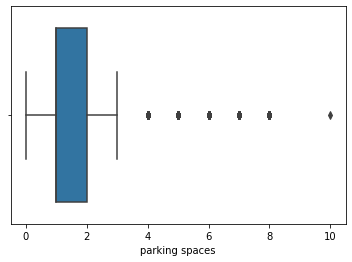

In [ ]:
sns.boxplot(df_houses_2['parking spaces'])

### Floor

In [ ]:
df_houses_2['floor'].unique()

array(['7', '6', '2', '1', '10', '11', '8', '17', '-', '5', '3', '13',
       '4', '20', '15', '26', '14', '9', '27', '12', '23', '18', '16',
       '21', '25', '24', '19', '22', '32', '35', '46', '28', '29', '301',
       '51'], dtype=object)

In [ ]:
df_houses_2 = df_houses.rename(columns={'floor':'floors'})

df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df_houses_2['floors'] = df_houses_2['floors'].replace('-','0')

In [ ]:
df_houses_2['floors'].unique()

array(['7', '20', '6', '2', '1', '0', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [ ]:
df_houses_2['floors'] = df_houses_2['floors'].astype(int)

In [ ]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10683 non-null  object
 1   area                 10683 non-null  int64 
 2   rooms                10683 non-null  int64 
 3   bathroom             10683 non-null  int64 
 4   parking spaces       10683 non-null  int64 
 5   floors               10683 non-null  int64 
 6   animal               10683 non-null  object
 7   furniture            10683 non-null  object
 8   hoa (R$)             10683 non-null  int64 
 9   rent amount (R$)     10683 non-null  int64 
 10  property tax (R$)    10683 non-null  int64 
 11  fire insurance (R$)  10683 non-null  int64 
 12  total (R$)           10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
df_houses_2['floors'].describe()

count    10683.000000
mean         5.069643
std          6.069869
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        301.000000
Name: floors, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


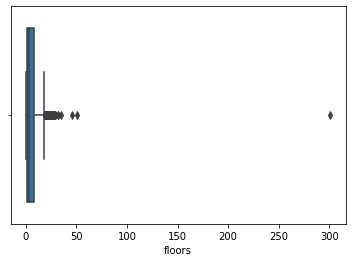

In [ ]:
sns.boxplot(df_houses_2['floors'])

In [ ]:
df_houses_2['floors'].unique()

array([  7,  20,   6,   2,   1,   0,   4,   3,  10,  11,  24,   9,   8,
        17,  18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,
        23,  35,  25,  46,  28,  29, 301,  51,  32])

In [ ]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10683 non-null  object
 1   area                 10683 non-null  int64 
 2   rooms                10683 non-null  int64 
 3   bathroom             10683 non-null  int64 
 4   parking spaces       10683 non-null  int64 
 5   floors               10683 non-null  int64 
 6   animal               10683 non-null  object
 7   furniture            10683 non-null  object
 8   hoa (R$)             10683 non-null  int64 
 9   rent amount (R$)     10683 non-null  int64 
 10  property tax (R$)    10683 non-null  int64 
 11  fire insurance (R$)  10683 non-null  int64 
 12  total (R$)           10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
df_81 = (df_houses_2['floors']> 81).sum()

df_81

1

In [ ]:
df_houses_2['floors'].value_counts()

0      2456
1      1081
2       984
3       930
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      302
12      256
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
46        1
35        1
Name: floors, dtype: int64

Now we are going to drop the value above 81 

In [ ]:
df_houses_2 = df_houses_2.query('floors<81')

In [ ]:
df_houses_2['floors'].unique()

array([ 7, 20,  6,  2,  1,  0,  4,  3, 10, 11, 24,  9,  8, 17, 18,  5, 13,
       15, 16, 14, 26, 12, 21, 19, 22, 27, 23, 35, 25, 46, 28, 29, 51, 32])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


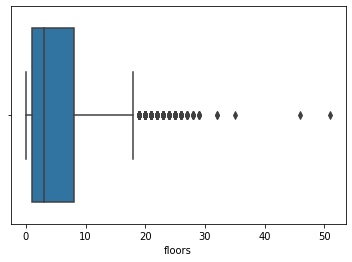

In [ ]:
sns.boxplot(df_houses_2['floors'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


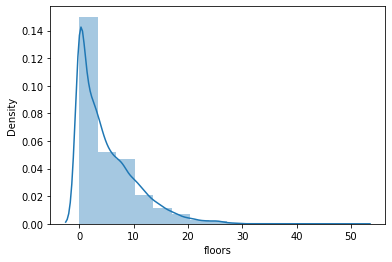

In [ ]:
sns.distplot(df_houses_2['floors'],bins=15)

### Animal

In [ ]:
df_houses_2['animal'].unique()

array(['acept', 'not acept'], dtype=object)

In [ ]:
df_houses_2['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

### Other Columns

In [ ]:
 df_houses_2[['hoa (R$)',	'rent amount (R$)',	'property tax (R$)'	,'fire insurance (R$)']]

,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,2065,3300,211,42
1,1200,4960,1750,63
2,1000,2800,0,41
3,270,1112,22,17
4,0,800,25,11
...,...,...,...,...
10687,402,1478,24,22
10688,3100,15000,973,191
10689,980,6000,332,78
10690,1585,12000,279,155


We have some suspect values on hoa(Homeowners association tax) and property tax(municipal property tax)  let's see them individually

In [ ]:
 df_houses_2[['hoa (R$)',	'rent amount (R$)',	'property tax (R$)'	,'fire insurance (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
hoa (R$),10682.0,1174.122355,15599.561226,0.0,170.00,560.0,1236.75,1117000.0
rent amount (R$),10682.0,3893.737034,3407.669795,450.0,1529.25,2650.0,5000.00,45000.0
property tax (R$),10682.0,365.301442,3108.040362,0.0,38.00,125.0,375.00,313700.0
fire insurance (R$),10682.0,53.261000,47.748552,3.0,21.00,36.0,68.00,677.0


In [ ]:
df_houses_2['hoa (R$)'].describe()

count    1.068200e+04
mean     1.174122e+03
std      1.559956e+04
min      0.000000e+00
25%      1.700000e+02
50%      5.600000e+02
75%      1.236750e+03
max      1.117000e+06
Name: hoa (R$), dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


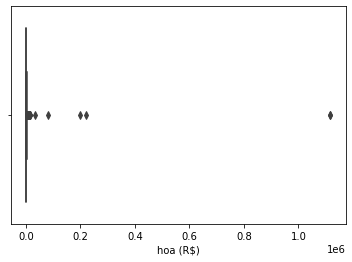

In [ ]:
sns.boxplot(df_houses_2['hoa (R$)'])

In [ ]:
df_houses_2['hoa (R$)'].value_counts()

0       2370
400      177
300      168
500      164
600      141
        ... 
1685       1
3756       1
187        1
171        1
1907       1
Name: hoa (R$), Length: 1679, dtype: int64

In [ ]:
df_houses_2['hoa (R$)'] = df_houses_2.rename({'hoa (R$)':'hoa'},axis=1, inplace=True)

In [ ]:
df_houses_2 = df_houses_2.drop('hoa (R$)',axis=1)

In [ ]:
df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


We are no going to use values above 10000 because they are consider luxury condominium [luxury](https://www1.folha.uol.com.br/sobretudo/morar/2017/06/1891861-condominios-oferecem-servicos-exclusivos-e-chegam-a-custar-r-30-mil.shtml)

In [ ]:
filter = df_houses_2.query('hoa <10000')

In [ ]:
filter['hoa'].value_counts()

0       2370
400      177
300      168
500      164
600      141
        ... 
171        1
4265       1
2210       1
2178       1
1883       1
Name: hoa, Length: 1670, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


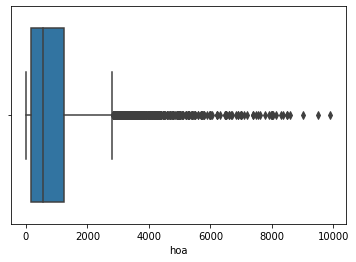

In [ ]:
sns.boxplot(filter['hoa'])

In [ ]:
cond = df_houses_2.query('hoa <=3000')

In [ ]:
df_houses_2 = cond

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


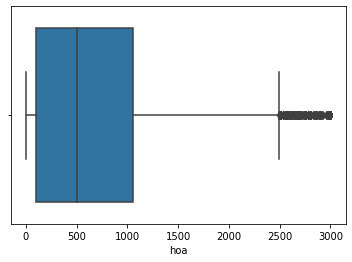

In [ ]:
sns.boxplot(df_houses_2['hoa'])

In [ ]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10097 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10097 non-null  object
 1   area                 10097 non-null  int64 
 2   rooms                10097 non-null  int64 
 3   bathroom             10097 non-null  int64 
 4   parking spaces       10097 non-null  int64 
 5   floors               10097 non-null  int64 
 6   animal               10097 non-null  object
 7   furniture            10097 non-null  object
 8   hoa                  10097 non-null  int64 
 9   rent amount (R$)     10097 non-null  int64 
 10  property tax (R$)    10097 non-null  int64 
 11  fire insurance (R$)  10097 non-null  int64 
 12  total (R$)           10097 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


Property Tax 

In [ ]:
df_houses_2['property tax (R$)'].describe()

count     10097.000000
mean        299.344756
std        3171.406208
min           0.000000
25%          34.000000
50%         114.000000
75%         317.000000
max      313700.000000
Name: property tax (R$), dtype: float64

We have a value next to 50000 and another next to 300000 biasing our data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


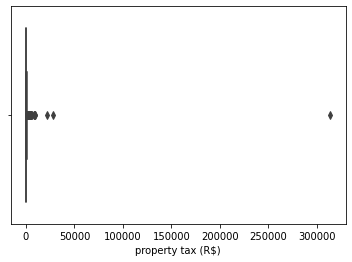

In [ ]:
sns.boxplot(df_houses_2['property tax (R$)'])

In [ ]:
df_houses_2['property tax (R$)'] = df_houses_2.rename({'property tax (R$)':'property'},axis=1, inplace=True)

In [ ]:
df_houses_2 = df_houses_2.drop('property tax (R$)',axis=1)

In [ ]:
df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
filter2 = df_houses_2.query('property >=20000')

filter2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880,151,32040
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900


In [ ]:
filter2['property'].unique()

array([ 21880,  28120, 313700])

In [ ]:
df_houses_2 = df_houses_2.query('property != 313700')

In [ ]:
df_houses_2.query('property >300000')

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)


# Exploratory Data Analysis

In [ ]:
df_houses_2.head()

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa,rent amount (R$),property,fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Some cities have higher properties prices





In [ ]:
df_houses_2.groupby('city')['total (R$)'].median().sort_values(ascending = False)

city
São Paulo         4169.5
Rio de Janeiro    3161.5
Belo Horizonte    2979.0
Porto Alegre      2206.0
Campinas          2112.5
Name: total (R$), dtype: float64

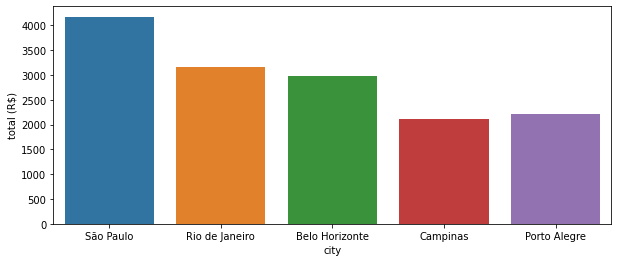

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x= df_houses_2['city'], y= df_houses_2['total (R$)'],ci= False,estimator= np.median,order=["São Paulo", "Rio de Janeiro","Belo Horizonte","Campinas","Porto Alegre"]);

## Having animals impact on the prices

In [ ]:
city = df_houses_2.groupby('animal')['rent amount (R$)']
display(city.agg(['mean', 'median']))

,mean,median
animal,,
acept,3702.986709,2560
not acept,3233.686922,2200


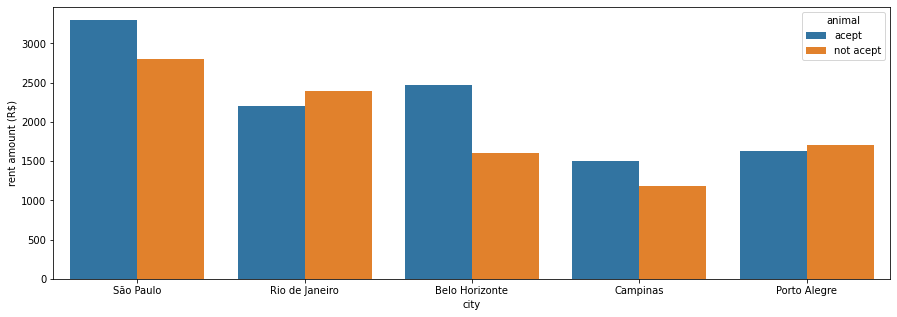

In [ ]:
plt.figure(figsize= (15,5))
sns.barplot(x= df_houses_2['city'], y= df_houses_2['rent amount (R$)'],hue=df_houses_2['animal'],ci= False,estimator= np.median,order=["São Paulo", "Rio de Janeiro","Belo Horizonte","Campinas","Porto Alegre"]);

## Houses with a higher condominium fee have a higher rent value

In [ ]:
df_houses_2.groupby('city')['hoa'].mean().sort_values(ascending = False)

city
Rio de Janeiro    928.761708
São Paulo         799.031970
Campinas          578.347619
Belo Horizonte    507.782538
Porto Alegre      447.089301
Name: hoa, dtype: float64

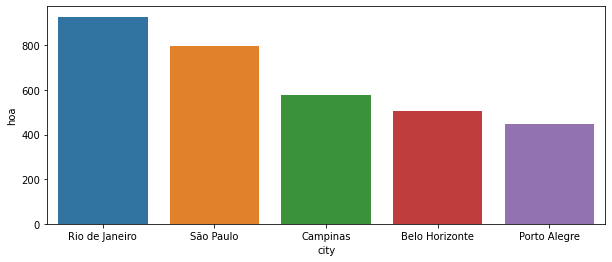

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'hoa',data= df_houses_2,ci=False,
            order= ('Rio de Janeiro','São Paulo','Campinas','Belo Horizonte','Porto Alegre'));

In [ ]:
df_houses_2.groupby('city')['rent amount (R$)'].mean().sort_values(ascending = False)

city
São Paulo         4252.737546
Belo Horizonte    3567.354082
Rio de Janeiro    3010.212810
Porto Alegre      2303.133951
Campinas          2288.547619
Name: rent amount (R$), dtype: float64

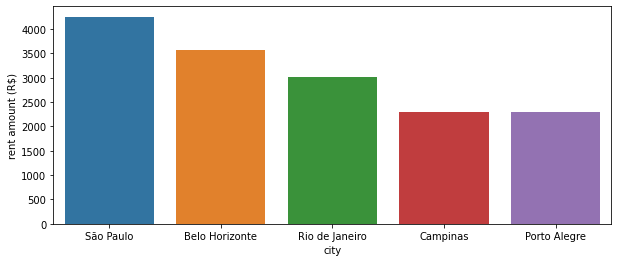

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'rent amount (R$)',ci= False,data= df_houses_2,order= ('São Paulo','Belo Horizonte','Rio de Janeiro','Campinas','Porto Alegre'));

In [ ]:
corresp = df_houses_2[['rent amount (R$)','hoa']].corr()

corresp

,rent amount (R$),hoa
rent amount (R$),1.000000,0.306862
hoa,0.306862,1.000000


## Furnished houses have a higher rent value;

In [ ]:
df_houses_2.groupby('furniture')['rent amount (R$)'].mean().sort_values(ascending = False)

furniture
furnished        4540.124226
not furnished    3299.733220
Name: rent amount (R$), dtype: float64

<Figure size 1080x432 with 0 Axes>

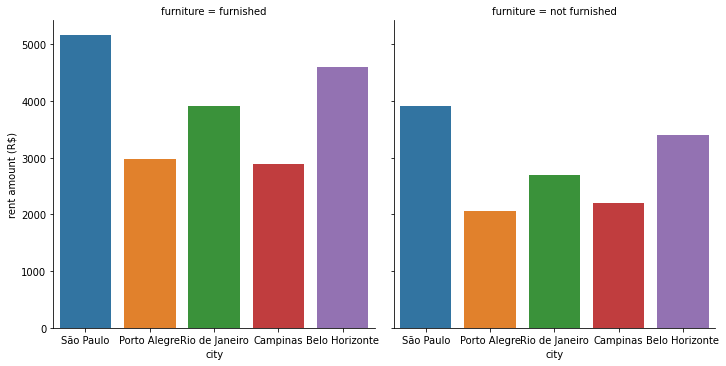

In [ ]:
plt.figure(figsize=(15,6))
sns.catplot(x='city',y ='rent amount (R$)',col = 'furniture',kind= 'bar',ci= False,data= df_houses_2);

## The number of parking spaces impact on rent value.

In [ ]:
df_houses_2.groupby('parking spaces')['rent amount (R$)'].mean().sort_values(ascending = False)



parking spaces
7     9043.103448
8     8744.806723
6     8625.318182
5     7738.756098
4     7124.914336
3     6131.454982
2     4337.971371
10    3900.000000
1     2568.145949
0     2085.870238
Name: rent amount (R$), dtype: float64

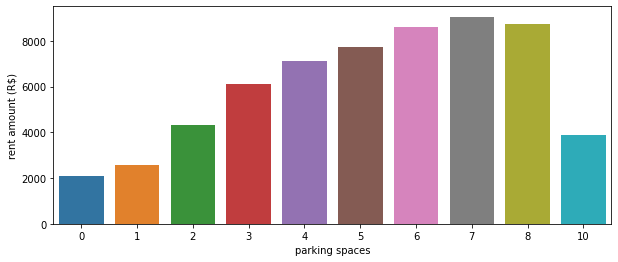

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x= 'parking spaces', y= 'rent amount (R$)', data= df_houses_2, ci= False)

In [ ]:

corresp = df_houses_2[['rent amount (R$)','parking spaces']].corr()

corresp

,rent amount (R$),parking spaces
rent amount (R$),1.000000,0.562845
parking spaces,0.562845,1.000000


## Correlations

Finally, we can see which variables have a greater correlation with the rent value

Area 

Bathroom 

Parking Space

Fire Insurance





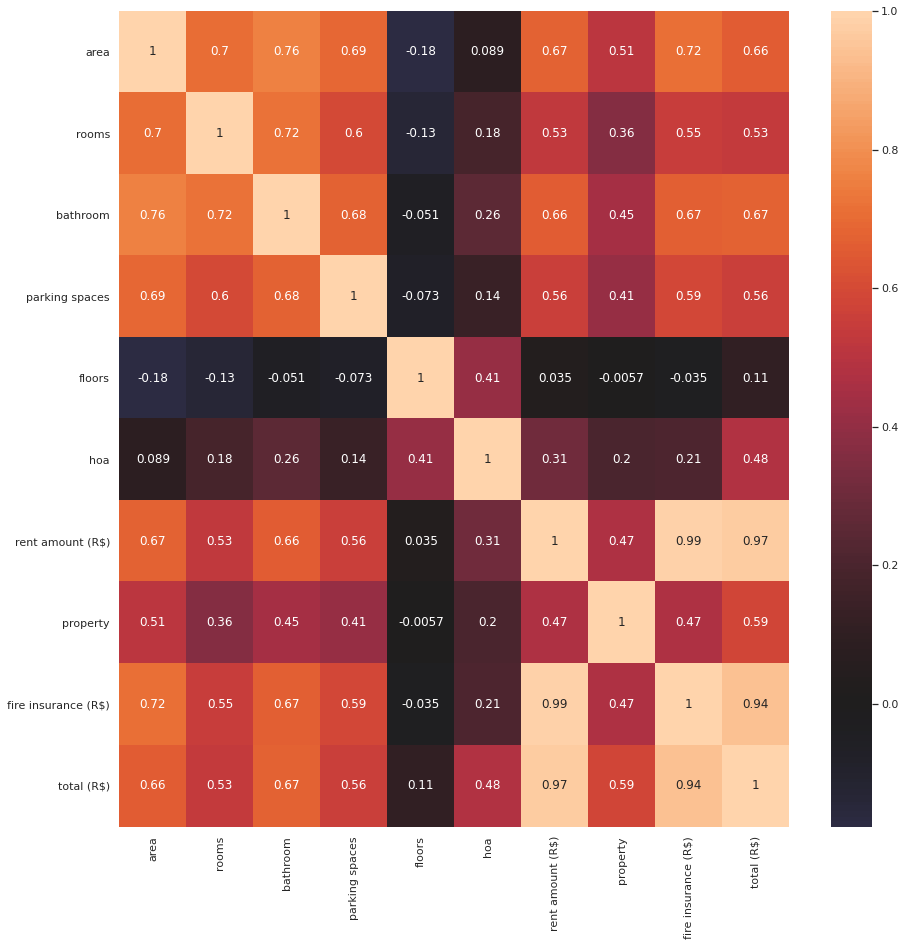

In [ ]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(df_houses_2.corr(),center=0,annot=True)